#### K-NN Algorithm

1) Load the data<br>
2) Initialize K to your chosen number of neighbors.<br>
3) For getting the predicted class, iterate from 1 to total number of training data points 
<br>
a) Calculate the distance between test data and each row of training data. Here we will use
Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Manhattan, etc.
<br>
b) Sort the calculated distances in ascending order based on distance values<br>
c) Get top k rows from the sorted array<br>
d) Get the most frequent class of these rows<br>
e) Return the predicted class

In [ ]:
# https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
# https://in.mathworks.com/campaigns/offers/mastering-machine-learning-with-matlab.html?gclid=Cj0KCQjwna2FBhDPARIsACAEc_WT13kxmF3vQdHpuILKSRfH7vbR7SsBptnD3QExK2j_WTIbuYUStU4aApzAEALw_wcB&ef_id=Cj0KCQjwna2FBhDPARIsACAEc_WT13kxmF3vQdHpuILKSRfH7vbR7SsBptnD3QExK2j_WTIbuYUStU4aApzAEALw_wcB:G:s&s_kwcid=AL!8664!3!281758943688!p!!g!!k-nearest%20neighbors&s_eid=psn_57384029232&q=k-nearest+neighbors
# https://www.sciencedirect.com/topics/mathematics/length-sepal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('C:/Users/iris.data')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
df.shape

(149, 5)

In [7]:
df.columns = ['sepal_length','sepal_width','patel_length','patel_width','Class']

In [9]:
df.head(2)

,sepal_length,sepal_width,patel_length,patel_width,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa


In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
patel_length    0
patel_width     0
Class           0
dtype: int64

In [13]:
df['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
df['Class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Class, dtype: int64

In [21]:
df.query('Class=="Iris-setosa"')
df.query('Class =="Iris-virginica"')
df.query('Class=="Iris-versicolor"').head(2)

,sepal_length,sepal_width,patel_length,patel_width,Class
49,7.0,3.2,4.7,1.4,Iris-versicolor
50,6.4,3.2,4.5,1.5,Iris-versicolor


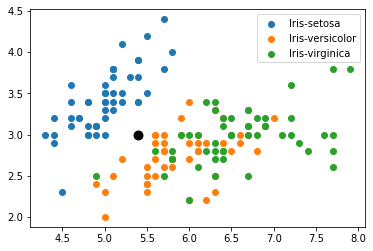

In [38]:
for a in df['Class'].unique():
    cnd='Class=="'+a+'"'
    dfnew=df.query(cnd)
    plt.scatter(dfnew['sepal_length'],dfnew['sepal_width'], label=a)
plt.scatter(5.4,3.0, color ='black',s=80)
plt.legend()
plt.show()

### Euclidean Distence
1) Point p1(x1,y1)<br>
2) Point p2(x2,y2)<br>
3) Distance d(p1,p2) = ((y2-y1)^2 + (x2-x1)^2))^(0.5)

In [60]:
df.head()
df['Colors'] = df['Class'].replace({'Iris-setosa':'red','Iris-versicolor':'blue',
                                   'Iris-virginica':'yellow'})
df.sample(5)

,sepal_length,sepal_width,patel_length,patel_width,Class,Colors
110,6.4,2.7,5.3,1.9,Iris-virginica,yellow
19,5.4,3.4,1.7,0.2,Iris-setosa,red
98,5.7,2.8,4.1,1.3,Iris-versicolor,blue
23,4.8,3.4,1.9,0.2,Iris-setosa,red
129,7.4,2.8,6.1,1.9,Iris-virginica,yellow


In [61]:
df['Class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Class, dtype: int64

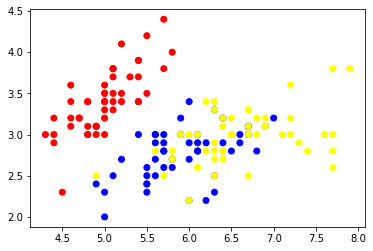

In [62]:
plt.scatter(df['sepal_length'],df['sepal_width'],color=df['Colors'])
plt.show()

In [63]:
df.head()

,sepal_length,sepal_width,patel_length,patel_width,Class,Colors
0,4.9,3.0,1.4,0.2,Iris-setosa,red
1,4.7,3.2,1.3,0.2,Iris-setosa,red
2,4.6,3.1,1.5,0.2,Iris-setosa,red
3,5.0,3.6,1.4,0.2,Iris-setosa,red
4,5.4,3.9,1.7,0.4,Iris-setosa,red


In [64]:
x=df.iloc[:,0:4]        # x= df[['swpal_length','sepal_width','patel_lenth',patel_width]]
y=df.iloc[:,-2]         # y= df['Class']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(149, 4)
(149,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [65]:
x.head(2)

,sepal_length,sepal_width,patel_length,patel_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2


In [68]:
y.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Class, dtype: int64

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier(n_neighbors = 21)
knn.fit(x,y)
knn.score(x,y)

0.9798657718120806

In [76]:
y_pred = knn.predict(x)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       '

In [80]:
df['Pred_Class']  = knn.predict(x)   # y_pred
df.head(2)

,sepal_length,sepal_width,patel_length,patel_width,Class,Colors,Pred_Class
0,4.9,3.0,1.4,0.2,Iris-setosa,red,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa,red,Iris-setosa


In [82]:
df.groupby(['Class','Pred_Class'])['Class'].value_counts()

Class            Pred_Class       Class          
Iris-setosa      Iris-setosa      Iris-setosa        49
Iris-versicolor  Iris-versicolor  Iris-versicolor    48
                 Iris-virginica   Iris-versicolor     2
Iris-virginica   Iris-versicolor  Iris-virginica      1
                 Iris-virginica   Iris-virginica     49
Name: Class, dtype: int64

### Confusion_Matrix

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
confusion_matrix(y,y_pred)

array([[49,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [ ]:
### 

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.9798657718120806

### Classification_Report

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        49
Iris-versicolor       0.98      0.96      0.97        50
 Iris-virginica       0.96      0.98      0.97        50

       accuracy                           0.98       149
      macro avg       0.98      0.98      0.98       149
   weighted avg       0.98      0.98      0.98       149



In [92]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: Class, Length: 149, dtype: object


In [103]:
print(y_pred)
print(y_pred.shape)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

In [96]:
print(knn.predict([[4.9,3.0,1.6,0.3]]))
print(knn.predict([[0.1,2.0,5.0,1.4]]))
print(knn.predict([[0.4,3.9,2.9,3.8]]))
print(knn.predict([[1.2,1.9,3.0,4.0]]))

['Iris-setosa']
['Iris-versicolor']
['Iris-setosa']
['Iris-versicolor']


In [98]:
df.head()

,sepal_length,sepal_width,patel_length,patel_width,Class,Colors,Pred_Class
0,4.9,3.0,1.4,0.2,Iris-setosa,red,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa,red,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa,red,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa,red,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa,red,Iris-setosa


In [97]:
print(knn.predict([[1.9,1.0,1.6,0.3]]))
print(knn.predict([[0.1,0.6,0.6,0.4]]))

['Iris-setosa']
['Iris-setosa']


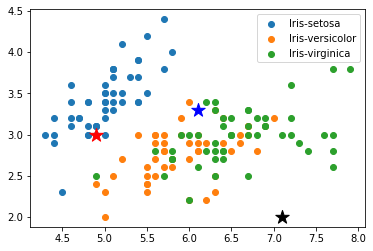

In [114]:
for a in df['Class'].unique():
    cnd='Class=="'+a+'"'
    dfnew=df.query(cnd)
    plt.scatter(dfnew['sepal_length'],dfnew['sepal_width'],label=a)
plt.scatter(4.9,3.0,s=200, color='red', marker='*')
plt.scatter(6.1,3.3,s=200, color='blue', marker='*')
plt.scatter(7.1,2.0,s=200, color='black', marker='*')
plt.legend()
plt.show()

### df Sample (10)

In [118]:
test = pd.DataFrame({'sepal_length':[4.8,4.5,5.4,6.9,7.0],
                     'sepal_width':[3.2,2.5,2.3,3.1,2.1],
                    'petal_length':[1.3,5.3,4.5,5.4,6.2],
                    'petal_width':[0.4,1.7,0.3,2.1,3.2]
                    }
                   )
test

,sepal_length,sepal_width,petal_length,petal_width
0,4.8,3.2,1.3,0.4
1,4.5,2.5,5.3,1.7
2,5.4,2.3,4.5,0.3
3,6.9,3.1,5.4,2.1
4,7.0,2.1,6.2,3.2


In [119]:
test_data = knn.predict(test)
test_data

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

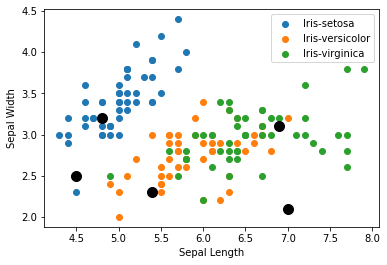

In [126]:
for a in df['Class'].unique():
    cnd='Class =="'+a+'"'
    dfnew=df.query(cnd)
    plt.scatter(dfnew['sepal_length'],dfnew['sepal_width'], label=a)
plt.scatter(4.8,3.2, s=100, color='black') # iris-setosa
plt.scatter(4.5,2.5, s=100, color='black') # iris-setosa
plt.scatter(6.9,3.1, s=100, color='black') # iris-virginica
plt.scatter(5.4,2.3, s=100, color='black') # iris-versicolor
plt.scatter(7.0,2.1, s=100, color='black') # iris-virginica
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()  